# Multi-Dimensional Linear Regression 
# Data Re-Processing

The [dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) used for this excercise in Multi-Dimensional Linear Regression is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Theoretical background 

- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
- [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler 

import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("housing.csv", na_values='') 

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


--- 
## Missing values

According to [the README.md provided with the dataset](https://github.com/ageron/handson-ml/blob/master/datasets/housing/README.md) 

> The dataset in this directory is almost identical to the original, with two differences:
> - 207 values were randomly removed from the total_bedrooms column, so we can discuss what to do with missing data. [...]

Missing values will be replaced by the mean value of the variable. 
Since the missing values have been removed *randomly* this replacement should not affect the (fit of the) model. 

In [5]:
data = data.fillna(data.mean())

--- 
## Exploratory descriptive analysis 

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
random_sample = data.sample(n=1032, random_state=11)

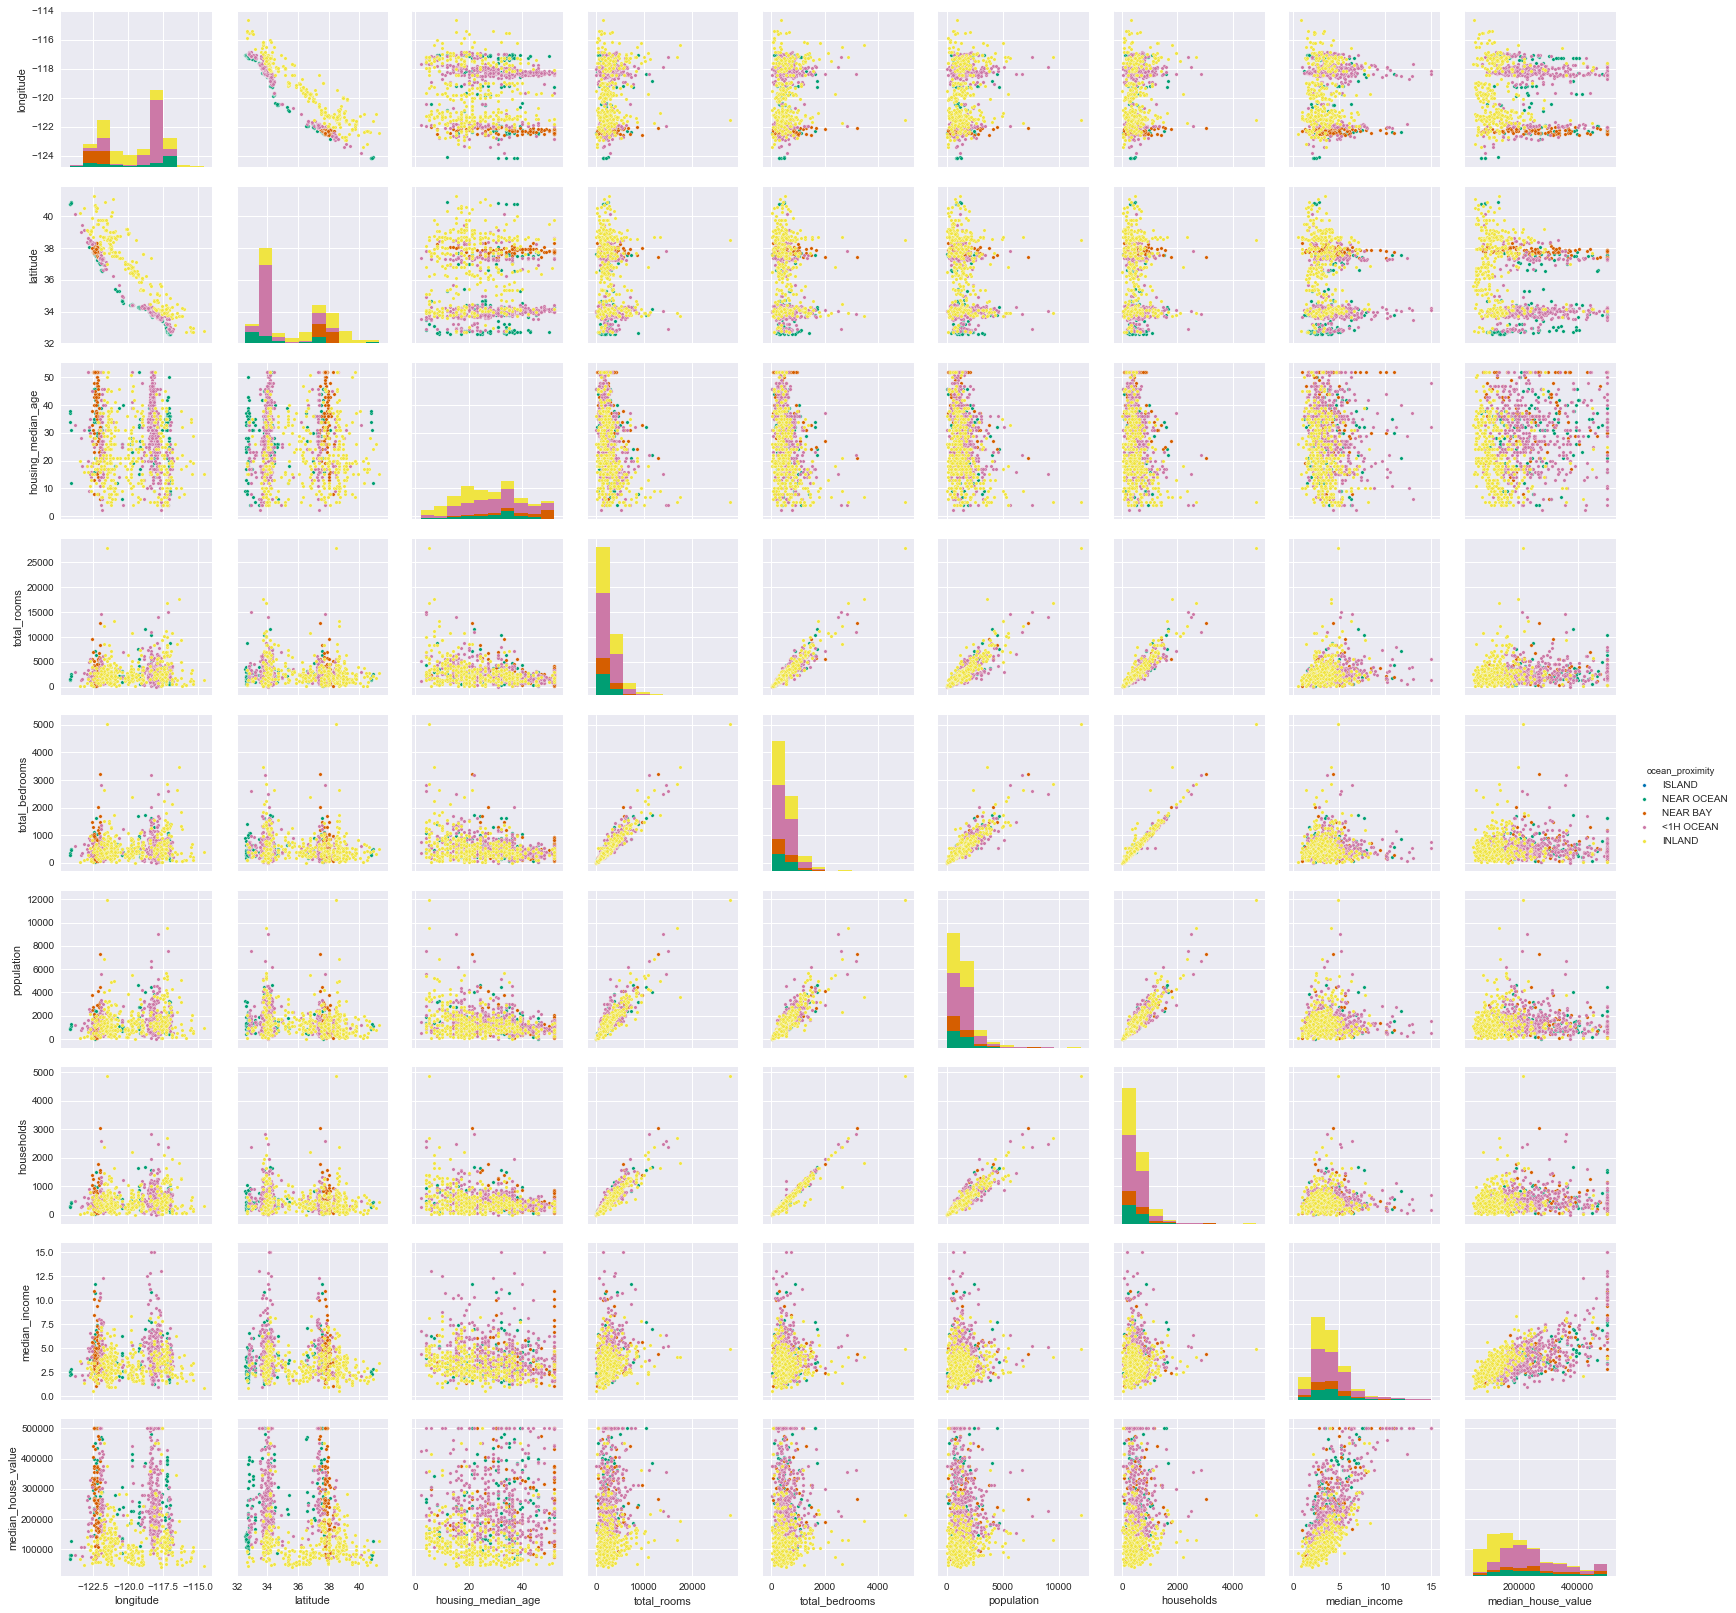

In [8]:
""" --------------------------------------------------------------------
this function will create a grid of Axes such that each variable in data
will by shared in the y-axis across a single row and in the x-axis 
across a single column. The diagonal Axes are treated differently, 
drawing a plot to show the univariate distribution of the data for the 
variable in that column. 

URL: https://seaborn.pydata.org/generated/seaborn.pairplot.html

Since this takes a lot of computing to plot, I only use a random sample 
of about 1/10 of the data. 

For alternative palettes see 
URL: https://seaborn.pydata.org/tutorial/color_palettes.html
-------------------------------------------------------------------- """

hue_order = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]

sns.pairplot(random_sample, hue="ocean_proximity", hue_order=hue_order, \
             markers=".", palette="colorblind");

--- 
## Normalization

### Alternative approach to handling outliers (e.g. ```median_house_value``` and ```housing_median_age```)
- define range for numerical data to be scaled (e.g. 0 to 50,0000 USD) 
- define scale (e.g. -1 to +1) 
- set binary (categorical) variable for outliers e.g. OutlierMax and OutlierMin 
- set original variable for outliers to 0. 

I decided to re-code variables that show a skewed distributions. This applies to ```housing_median_age``` and ```median_house_value```. 

In [9]:
data_norm = data.copy()

In [10]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


--- 

### Recode ```median_house_value```

In [11]:
""" --------------------------------------------------------------------
select rows with median_house_value equal to 500001 
and re-code with boolean in new column 
-------------------------------------------------------------------- """

data_norm["top_house_value"] = [1 if ele == 500001 else 0 for ele \
                                in data_norm['median_house_value']]

In [12]:
# establish mean value *before* manipulation as baseline 
data_norm['median_house_value'].mean()

206855.81690891474

In [13]:
# calculate the median for all rows not matching above condition 
low_house_value = data_norm[(data_norm['median_house_value']\
                             != 500001) == True].median_house_value.mean()
low_house_value

192477.92101651843

In [14]:
""" --------------------------------------------------------------------
overwrite original value with the mean value only if value is bogus 
-------------------------------------------------------------------- """

data_norm["median_house_value"] = [low_house_value \
                                   if ele == 500001 else ele for ele \
                                   in data_norm['median_house_value']]

In [15]:
# establish mean value *after* manipulation as indicator 
data_norm['median_house_value'].mean()

192477.92101652132

In [16]:
data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,top_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


--- 

### Recode ```housing_median_age```

In [17]:
""" --------------------------------------------------------------------
select rows with median_house_value equal to 52  
and re-code with boolean in new column 
-------------------------------------------------------------------- """

data_norm["top_housing_age"] = [1 if ele == 52 else 0 \
                                for ele in data_norm['housing_median_age']]

In [18]:
# establish mean value *before* manipulation as baseline 
data_norm['housing_median_age'].mean()

28.639486434108527

In [19]:
# calculate the median for all rows not matching above condition 
low_housing_age = data_norm[(data_norm['housing_median_age'] != 52) \
                            == 1].housing_median_age.mean()
low_housing_age

27.103991325450508

In [20]:
""" --------------------------------------------------------------------
overwrite original value with the mean value only if value is bogus 
-------------------------------------------------------------------- """

data_norm["housing_median_age"] = [low_housing_age \
                                   if ele == 52 else ele for ele \
                                   in data_norm['housing_median_age']]

In [21]:
# establish mean value *after* manipulation as indicator 
data_norm['housing_median_age'].mean()

27.10399132545142

In [22]:
data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,top_house_value,top_housing_age
0,-122.23,37.88,41.000000,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0
1,-122.22,37.86,21.000000,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0
2,-122.24,37.85,27.103991,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,1
3,-122.25,37.85,27.103991,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,1
4,-122.25,37.85,27.103991,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,1


In [23]:
data_norm = data_norm.reset_index(drop=True)

In [24]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
top_house_value       20640 non-null int64
top_housing_age       20640 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.9+ MB


### One hot encoding the ocean_proximity feature 
The categorical attribute ```ocean_proximity``` needs to be re-encoded to binary for data processing. 

In [25]:
data_norm['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
ocean_proximity_cat = data_norm['ocean_proximity']
ocean_proximity_encoded, ocean_proximity_categories = ocean_proximity_cat.factorize()

In [27]:
ocean_proximity_encoded

array([0, 0, 0, ..., 2, 2, 2])

In [28]:
ocean_proximity_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

OneHotEncoder encodes categorical integer features using a one-hot aka one-of-K scheme, see [sklearn.preprocessing.OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

In [29]:
encoder = OneHotEncoder()
ocean_proximity_cat_1hot = encoder.fit_transform(ocean_proximity_encoded.reshape(-1,1))

In [30]:
ocean_proximity_cat_1hot.shape

(20640, 5)

In [31]:
type(ocean_proximity_cat_1hot)

scipy.sparse.csr.csr_matrix

We need to [transform scipy.sparse.csr.csr_matrix to a numpy array](https://stackoverflow.com/questions/36967666/). 

In [32]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.toarray()

To [concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) our ```ocean_proximity_cat_1hot``` and ```data_norm``` we transform the numpy array to a Pandas DataFrame. 

In [33]:
ocean_proximity_cat_1hot = pd.DataFrame(ocean_proximity_cat_1hot)

At this point we *could* convert the float values to boolean values with 
```ocean_proximity_cat_1hot.astype('bool')```

However because we want to do a logistic regression later on we keep the floats.

In [34]:
ocean_proximity_cat_1hot.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


For clarity the [columns well be renamed](https://stackoverflow.com/questions/11346283/) to match the category labels. 

In [35]:
dict = {0:'NEAR BAY', 1:'<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'}

ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=dict)

In [36]:
ocean_proximity_cat_1hot.head()

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [37]:
ocean_proximity_cat_1hot.sum()

NEAR BAY      2290.0
<1H OCEAN     9136.0
INLAND        6551.0
NEAR OCEAN    2658.0
ISLAND           5.0
dtype: float64

Now we need to [concatenate](https://pandas.pydata.org/pandas-docs/stable/merging.html) our ```ocean_proximity_cat_1hot``` and ```data_norm```. 

In [38]:
""" --------------------------------------------------------------------
concatenate the numerical values from the first 10 rows 
with the new encoded ocean_proximity 
and the binary re-coded housing_value and housing_age 
-------------------------------------------------------------------- """

include1 = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income", "median_house_value"]

include2 = ["top_house_value", "top_housing_age"]

data_norm = pd.concat([data_norm[include1], \
                       ocean_proximity_cat_1hot,\
                       data_norm[include2]], axis=1, sort=False)

In [39]:
data_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,top_house_value,top_housing_age
0,-122.23,37.88,41.000000,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0,0,0
1,-122.22,37.86,21.000000,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0,0,0
2,-122.24,37.85,27.103991,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0,0,1
3,-122.25,37.85,27.103991,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0,0,1
4,-122.25,37.85,27.103991,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0,0,1


### Scaling with StandardScaler 
Standardize features by removing the mean and scaling to unit variance, see [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

#### Alternative: FunctionTransformer 

    data['median_income_log'] = data['median_income'].apply(np.log)
    transformer = FunctionTransformer(np.log1p)
    data['population_log_scales'] = transformer.transform(data['population'].values.reshape(-1, 1))

In [40]:
""" --------------------------------------------------------------------
define numerical and categorical (binary coded) variables 
-------------------------------------------------------------------- """

numerical = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income", "median_house_value"]

categorical = ["NEAR BAY", "<1H OCEAN", "INLAND", "NEAR OCEAN", \
               "ISLAND", "top_house_value", "top_housing_age"]

In [41]:
scaler = StandardScaler().fit(data_norm[numerical])

In [42]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaler.mean_

array([-1.19569704e+02,  3.56318614e+01,  2.71039913e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        1.92477921e+05])

In [44]:
scaler.scale_

array([2.00348319e+00, 2.13590065e+00, 1.10688135e+01, 2.18156240e+03,
       4.19256436e+02, 1.13243469e+03, 3.82320491e+02, 1.89977569e+00,
       9.53975475e+04])

In [45]:
data_scaled = scaler.transform(data_norm[numerical])

In [46]:
data_scaled = pd.DataFrame(data_scaled)

In [47]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.327835,1.052548,1.255420e+00,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.726717
1,-1.322844,1.043185,-5.514585e-01,2.045890,1.355088,0.861439,1.669961,2.332238,1.740318
2,-1.332827,1.038503,-3.209661e-16,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.673230
3,-1.337818,1.038503,-3.209661e-16,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.560020
4,-1.337818,1.038503,-3.209661e-16,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.569454


In [48]:
data_norm[numerical].columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [49]:
data_scaled.columns = data_norm[numerical].columns

In [50]:
data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,1.255420e+00,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.726717
1,-1.322844,1.043185,-5.514585e-01,2.045890,1.355088,0.861439,1.669961,2.332238,1.740318
2,-1.332827,1.038503,-3.209661e-16,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.673230
3,-1.337818,1.038503,-3.209661e-16,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.560020
4,-1.337818,1.038503,-3.209661e-16,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.569454


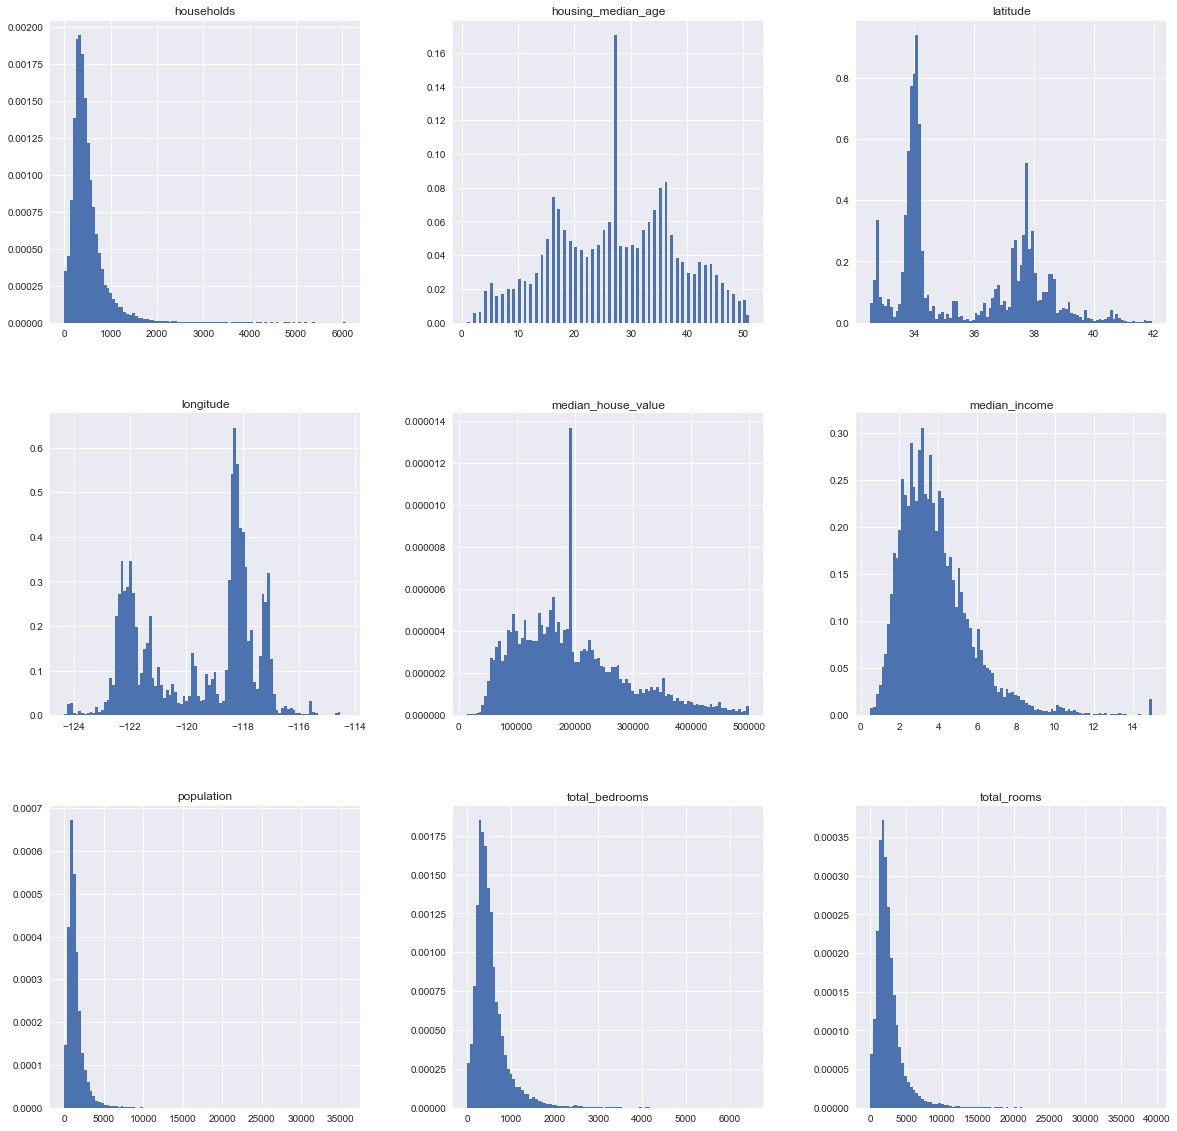

In [51]:
data_norm[numerical].hist(bins=100, density=True, figsize=(20,20))
plt.show();

In [52]:
""" --------------------------------------------------------------------
concatenate the rows holding (scaled) numerical and categorical values 
-------------------------------------------------------------------- """

data = pd.concat([data_scaled, data_norm[categorical]], axis=1, sort=False)

In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,top_house_value,top_housing_age
0,-1.327835,1.052548,1.255420e+00,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.726717,1.0,0.0,0.0,0.0,0.0,0,0
1,-1.322844,1.043185,-5.514585e-01,2.045890,1.355088,0.861439,1.669961,2.332238,1.740318,1.0,0.0,0.0,0.0,0.0,0,0
2,-1.332827,1.038503,-3.209661e-16,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.673230,1.0,0.0,0.0,0.0,0.0,0,1
3,-1.337818,1.038503,-3.209661e-16,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.560020,1.0,0.0,0.0,0.0,0.0,0,1
4,-1.337818,1.038503,-3.209661e-16,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.569454,1.0,0.0,0.0,0.0,0.0,0,1


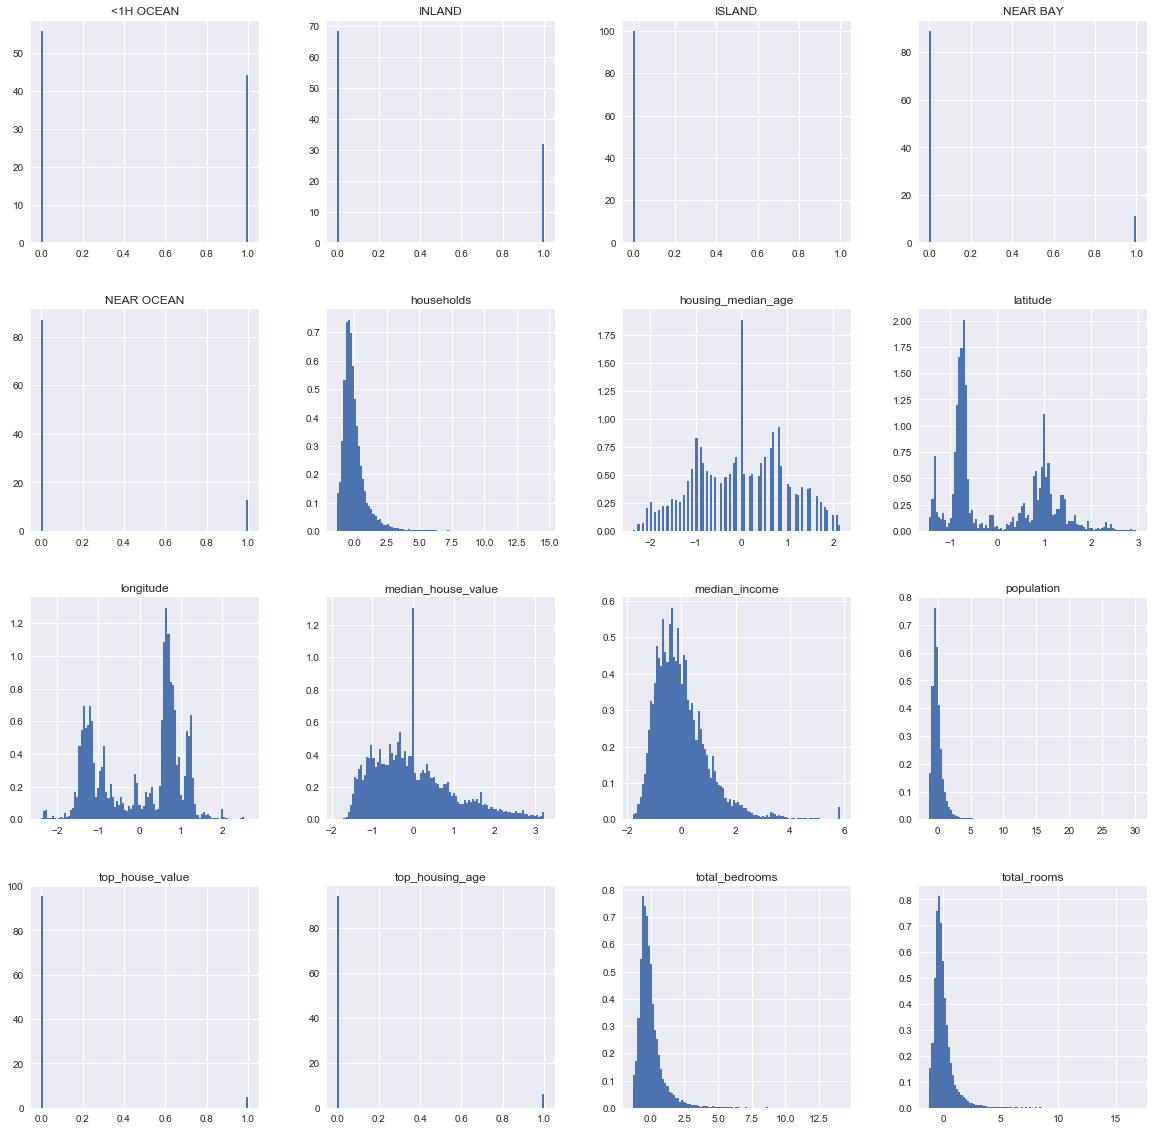

In [55]:
data.hist(bins=100, density=True, figsize=(20,20))
plt.show();

--- 
## Subsetting (Test and Training Split)

In [56]:
""" --------------------------------------------------------------------
Split the dataset pseudo-randomly into training and testing subsets 

URL: http://scikit-learn.org/stable/modules/generated/
     sklearn.model_selection.train_test_split.html
-------------------------------------------------------------------- """

data_train, data_test = train_test_split(data, test_size=0.2, \
                                         random_state=11)

In [57]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 20025 to 10137
Data columns (total 16 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
NEAR BAY              16512 non-null float64
<1H OCEAN             16512 non-null float64
INLAND                16512 non-null float64
NEAR OCEAN            16512 non-null float64
ISLAND                16512 non-null float64
top_house_value       16512 non-null int64
top_housing_age       16512 non-null int64
dtypes: float64(14), int64(2)
memory usage: 2.1 MB


In [58]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 2734 to 7930
Data columns (total 16 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4128 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
NEAR BAY              4128 non-null float64
<1H OCEAN             4128 non-null float64
INLAND                4128 non-null float64
NEAR OCEAN            4128 non-null float64
ISLAND                4128 non-null float64
top_house_value       4128 non-null int64
top_housing_age       4128 non-null int64
dtypes: float64(14), int64(2)
memory usage: 548.2 KB


In [59]:
""" --------------------------------------------------------------------
Exports the training and testing subsets for further handling. 

URL: http://scikit-learn.org/stable/modules/generated/
     sklearn.model_selection.train_test_split.html
-------------------------------------------------------------------- """

data_train.to_csv('data/data_train.csv', sep=',', index=False)
data_test.to_csv('data/data_test.csv', sep=',', index=False)

--- 
## This is where the fun begins!